In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn
from matplotlib.patches import Rectangle


In [2]:
# Handle the data from the CSV
import csv

csv_data = []
with open('data/combined_tweets.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            csv_data.append(row)
            line_count += 1


Column names are tweet_id, user, text, date, retweets, replies, likes, quotes, has_viz


In [3]:
# Get all of the tweets for all users and split between noviz and viz
viz = []
noviz = []

for tweet in csv_data :
    if tweet[-1] == "True":
        viz.append(int(tweet[6]))
    else:
        noviz.append(int(tweet[6]))

In [4]:
data = [noviz, viz]

In [5]:
fig = plt.figure(figsize =(10, 7))

<Figure size 720x504 with 0 Axes>

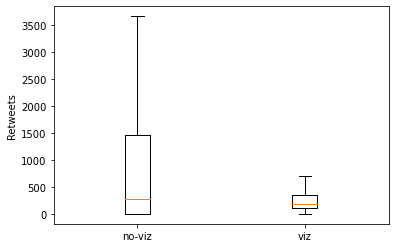

In [6]:
# Creating plot
plt.boxplot(data, notch=False, showfliers=False, labels=["no-viz", "viz"])
plt.ylabel("Retweets")
 
# show plot
plt.show()

In [7]:
a = np.histogram(viz)

In [8]:
def buildBins(min = 0, spacing = 1, numbins = 10) :
    ret = [min + float(x)*spacing for x in range(numbins)]
    return ret

def binCenters(bins):
    mids = []
    for i in range(len(bins)-1) :
        lower = bins[i]
        upper = bins[i+1]
        mid = (lower + upper) / 2
        mids.append(mid)
    return mids



0.019999999999999987


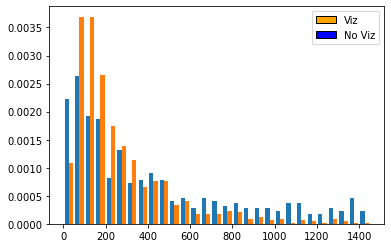

In [9]:
# Build the bins by user pref
bins = buildBins(min = 1, spacing = 50, numbins = 30)

# The top subplot is classic histo
n, x, _ = plt.hist(data, bins = bins, density = True)

colors = ["orange", "blue"]
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["Viz", "No Viz"]
plt.legend(handles, labels)

print(sum(n[1]))
#plt.close()

# # The bottom sublplot is a line 
# plt.subplot(212)
# bin_centers = binCenters(bins)
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# plt.plot(bin_centers, n[1], '-', c='red', label="Viz")
# plt.plot(bin_centers, n[0], '-', c='blue', label="No Viz")
# plt.title("Percent of Tweets (Viz & No Viz) Classified by Number of Retweets")
# plt.xlabel("Number of Retweets")
# plt.ylabel("Percent of Tweets")
# plt.legend(loc="upper right")
# # Show the plots
plt.show()

In [10]:
print(n)

[[2.23234624e-03 2.64236902e-03 1.91343964e-03 1.86788155e-03
  8.20045558e-04 1.32118451e-03 7.28929385e-04 7.74487472e-04
  9.11161731e-04 7.74487472e-04 4.10022779e-04 4.55580866e-04
  2.73348519e-04 4.55580866e-04 4.10022779e-04 3.18906606e-04
  3.64464692e-04 2.73348519e-04 2.73348519e-04 2.73348519e-04
  2.27790433e-04 3.64464692e-04 3.64464692e-04 1.82232346e-04
  1.82232346e-04 2.73348519e-04 2.27790433e-04 4.55580866e-04
  2.27790433e-04]
 [1.08720272e-03 3.69195923e-03 3.69195923e-03 2.65005663e-03
  1.74405436e-03 1.38165345e-03 1.13250283e-03 6.56851642e-04
  7.70101925e-04 7.70101925e-04 3.39750849e-04 4.07701019e-04
  1.81200453e-04 1.81200453e-04 1.81200453e-04 2.26500566e-04
  2.03850510e-04 9.06002265e-05 1.13250283e-04 6.79501699e-05
  9.06002265e-05 2.26500566e-05 6.79501699e-05 4.53001133e-05
  2.26500566e-05 9.06002265e-05 4.53001133e-05 2.26500566e-05
  2.26500566e-05]]


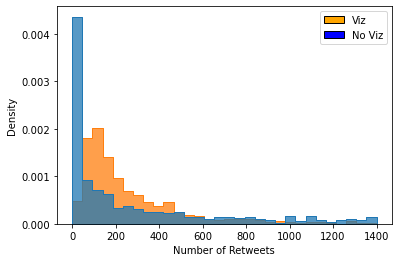

TypeError: savefig() takes 2 positional arguments but 3 were given

<Figure size 432x288 with 0 Axes>

In [46]:
hp = seaborn.histplot(data,element="step",binrange=(0,1400),stat='density')
#seaborn.histplot([i for i in data[1] if i != 0])
plt.legend(handles, labels)
plt.xlabel("Number of Retweets")
plt.show(hp)


In [50]:
# Get all of the tweets for all users and split between noviz and viz
def splitdata(csv_data) :
    viz = []
    noviz = []
    for tweet in csv_data :
        if tweet[-1] == "True":
            viz.append(int(tweet[6]))
        else:
            noviz.append(int(tweet[6]))
    return [noviz, viz]
#### Returns noviz first

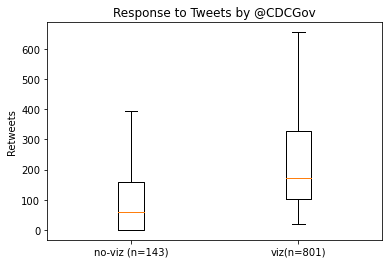

In [70]:
sgmd = []
for line in csv_data:
    name = line[1]
    if name == "CDCGov" :
        sgmd.append(line)

splitSGMD = splitdata(sgmd)

# Creating plot
plt.boxplot(splitSGMD, notch=False, showfliers=False, labels=["no-viz (n=143)", "viz(n=801)"])
plt.ylabel("Retweets")
plt.title("Response to Tweets by @CDCGov")
 
# show plot
plt.show()

In [69]:
print(len(splitSGMD[0]))
print(len(splitSGMD[1]))

143
801


In [73]:
novizt = data[0]
vizt = data[1]
summer = 0
for dat in vizt:
    if dat > 1400:
        summer+=1
print(summer/len(vizt) * 100)

2.4229074889867843


([<matplotlib.patches.Wedge at 0x7fa183067f70>,
 [Text(0.01149341156094834, 1.0999399535841448, 'NoViz'),
  Text(-0.01149341156094823, -1.0999399535841448, 'Viz')])

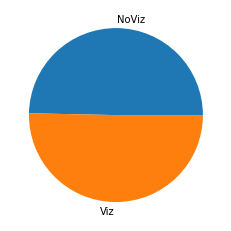

In [75]:
plt.pie([len(novizt), len(vizt)] , labels = ["NoViz", "Viz"])